In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                     names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python', encoding='ISO-8859-1', 
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

## Analysis of Movies

Text(0.5, 1.0, 'Number of Movies Per Decade')

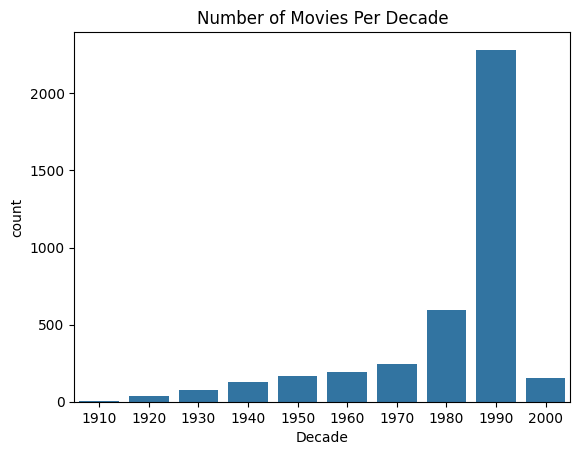

In [4]:
movies['Year'] = movies['Title'].str.slice(-5,-1).astype(int)
movies['Decade'] = (movies['Year'] // 10) * 10
sns.countplot(movies, x='Decade').set_title('Number of Movies Per Decade')

In [5]:
movies['Genres'] = movies['Genres'].str.split('|')
movies_genres = movies.explode('Genres')
movies_genres

,MovieID,Title,Genres,Year,Decade
0,1,Toy Story (1995),Animation,1995,1990
0,1,Toy Story (1995),Children's,1995,1990
0,1,Toy Story (1995),Comedy,1995,1990
1,2,Jumanji (1995),Adventure,1995,1990
1,2,Jumanji (1995),Children's,1995,1990
...,...,...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000
3882,3952,"Contender, The (2000)",Drama,2000,2000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Animation'),
  Text(1, 0, "Children's"),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Sci-Fi'),
  Text(12, 0, 'Documentary'),
  Text(13, 0, 'War'),
  Text(14, 0, 'Musical'),
  Text(15, 0, 'Mystery'),
  Text(16, 0, 'Film-Noir'),
  Text(17, 0, 'Western')])

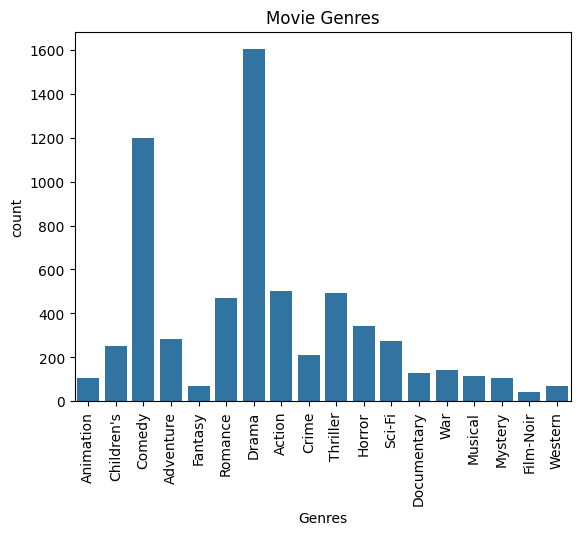

In [6]:
sns.countplot(movies_genres, x='Genres').set_title('Movie Genres')
plt.xticks(rotation=90)


## Analysis of Users

In [7]:
mapping = {
    1: 'Under 18', 
    18: '18-24', 
    25: '25-34', 
    35: '35-44', 
    45: '45-49', 
    50: '50-55', 
    56: '56+'
}

users['age_explained'] = users['Age'].map(mapping)

zipcodes = pd.read_csv('zipcodes.csv')
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].astype(str)
users = users.merge(zipcodes, right_on='ZIP Code', left_on='Zip-code', how='left').rename(columns={
    'USPS Default State for ZIP': 'State'
})
users

FileNotFoundError: [Errno 2] No such file or directory: 'zipcodes.csv'

[Text(0.5, 1.0, 'Users by Age and Gender'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Count')]

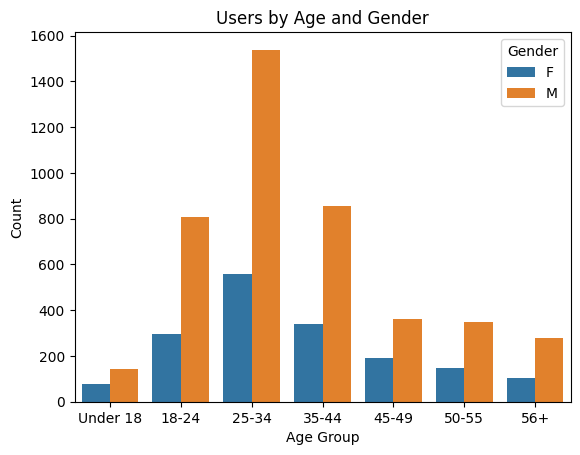

In [8]:
age_group_order = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

sns.countplot(users, x='age_explained', hue='Gender', order= age_group_order).set(title="Users by Age and Gender", xlabel="Age Group", ylabel="Count")


In [9]:
plt.figure(figsize=(15, 6))

states = users['State'].value_counts().sort_index()
plt.bar(states.index, states.values)
plt.xticks(rotation=45)

plt.title('Number of Users Per State')
plt.xlabel('State')
plt.ylabel('Count')

KeyError: 'State'

<Figure size 1500x600 with 0 Axes>

## Ratings

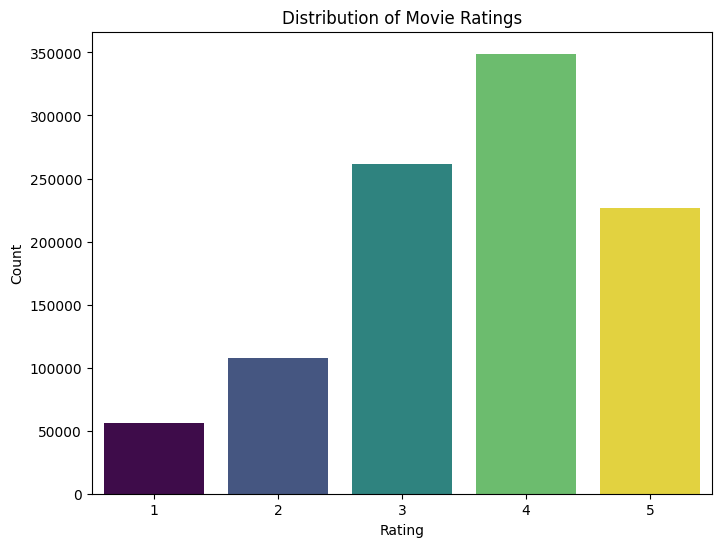

In [10]:
ratings
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=ratings, hue='Rating', legend=False, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

Text(0.5, 1.0, 'Average Rating per user by Gender')

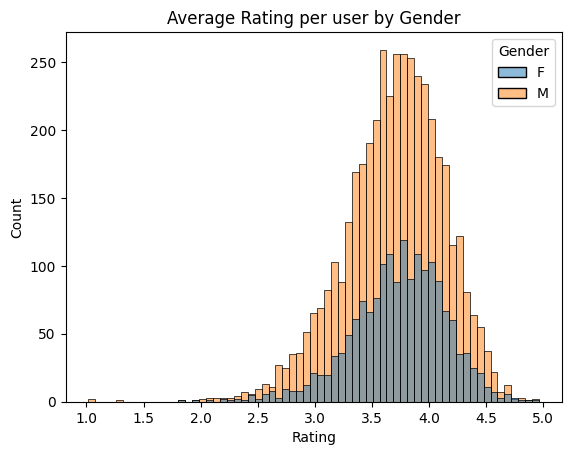

In [11]:
avg_ratings = users.merge(ratings.groupby('UserID')['Rating'].mean().reset_index(), on='UserID')


sns.histplot(avg_ratings, x='Rating', hue='Gender').set_title('Average Rating per user by Gender')

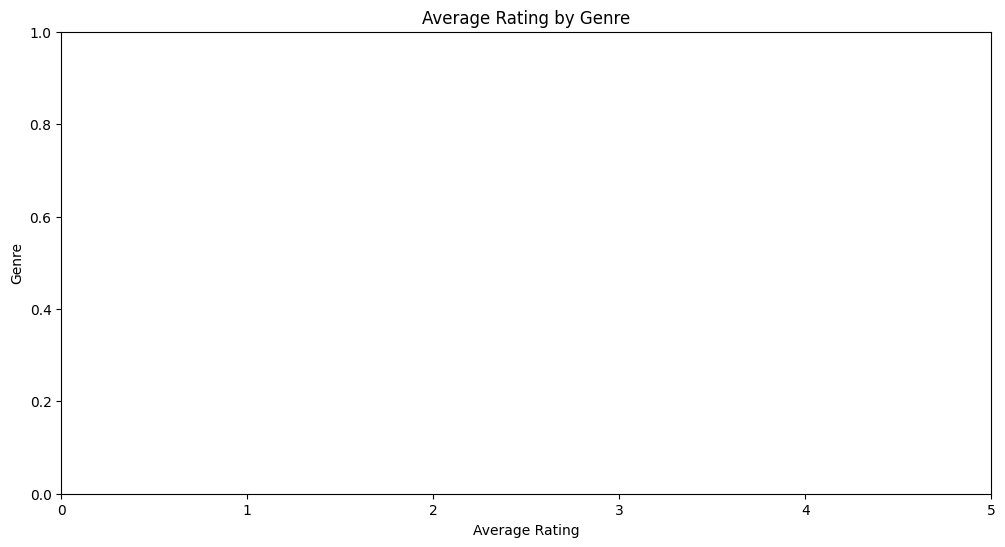

In [12]:
# Split genres into separate rows
movies_genres = movies.copy()
movies_genres['Genres'] = movies_genres['Genres'].str.split('|')
movies_genres = movies_genres.explode('Genres')

# Merge with ratings
ratings_genres = pd.merge(ratings, movies_genres, on='MovieID')

# Compute average rating per genre
genre_stats = ratings_genres.groupby('Genres')['Rating'].mean().reset_index()
genre_stats = genre_stats.sort_values('Rating', ascending=False)

# Plot average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Genres', data=genre_stats, hue='Genres', legend=False, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.xlim(0, 5)
plt.show()

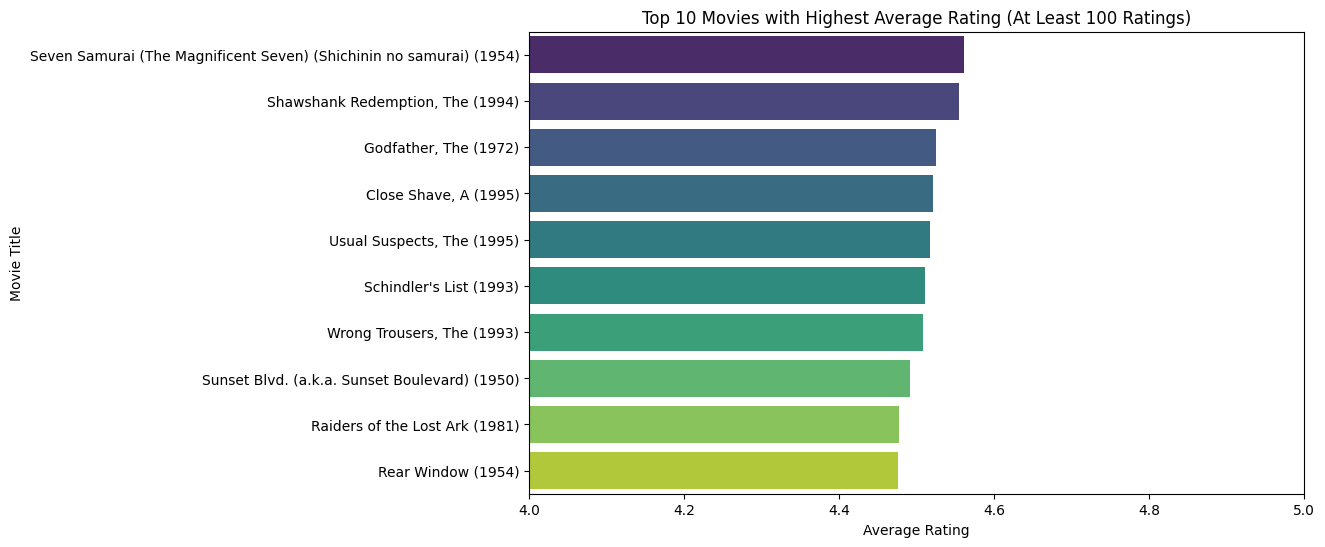

In [13]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Compute average rating and number of ratings per movie
movie_stats = ratings_movies.groupby('Title').agg(
    average_rating=('Rating', 'mean'),
    rating_count=('Rating', 'count')
).reset_index()

# Filter movies with at least 100 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 100]

# Get top 10 movies by average rating
top_movies = popular_movies.sort_values('average_rating', ascending=False).head(10)

# Plot top 10 movies
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='Title', data=top_movies, hue='Title', legend=False, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Average Rating (At Least 100 Ratings)')
plt.xlim(4, 5)
plt.show()

In [14]:
popular_movies.sort_values('average_rating', ascending=False)

,Title,average_rating,rating_count
2940,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
2970,"Shawshank Redemption, The (1994)",4.554558,2227
1354,"Godfather, The (1972)",4.524966,2223
713,"Close Shave, A (1995)",4.520548,657
3504,"Usual Suspects, The (1995)",4.517106,1783
...,...,...,...
2611,Police Academy 6: City Under Siege (1989),1.657718,149
46,Aces: Iron Eagle III (1992),1.640000,125
2604,Pokémon the Movie 2000 (2000),1.620000,100
308,Battlefield Earth (2000),1.611111,342
